<a href="https://colab.research.google.com/github/GianmarcoAndreana/NNDL/blob/main/Downsampling_and_Upsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Downsampling and Upsampling**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [2]:
# Define 4 by 4 original patch
orig_4_4 = np.array([[1, 3, 5,3 ], [6,2,0,8], [4,6,1,4], [2,8,0,3]])
print(orig_4_4)

[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]


In [3]:
def subsample(x_in):
    x_out = np.zeros((int(np.ceil(x_in.shape[0] / 2)), int(np.ceil(x_in.shape[1] / 2))))

    for i in range(x_out.shape[0]):
        for j in range(x_out.shape[1]):
            x_out[i, j] = x_in[i * 2, j * 2]  # Take every second element

    return x_out

In [4]:
print("Original:")
print(orig_4_4)
print("Subsampled:")
print(subsample(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Subsampled:
[[1. 5.]
 [4. 1.]]


Let's try that on an image to get a feel for how it works:

In [7]:
!wget https://raw.githubusercontent.com/GianmarcoAndreana/NNDL/6b5e0ba9f57c39b0b2aeb14ac6d62d41195f1a1e/assets/test-image.png -O test-image.png

--2025-03-28 09:26:38--  https://raw.githubusercontent.com/GianmarcoAndreana/NNDL/6b5e0ba9f57c39b0b2aeb14ac6d62d41195f1a1e/assets/test-image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24383 (24K) [image/png]
Saving to: ‘test-image.png’

test-image.png      100%[===================>]  23.81K  --.-KB/s    in 0s      

2025-03-28 09:26:38 (116 MB/s) - ‘test-image.png’ saved [24383/24383]



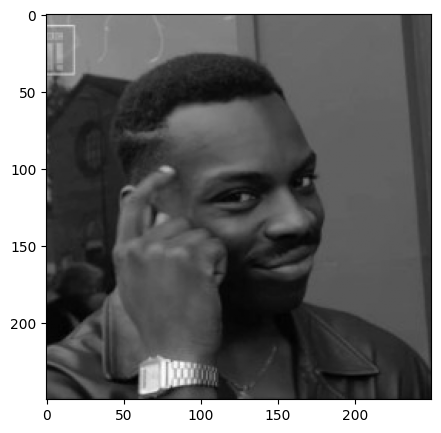

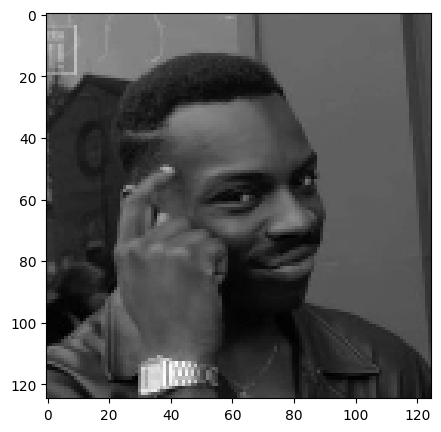

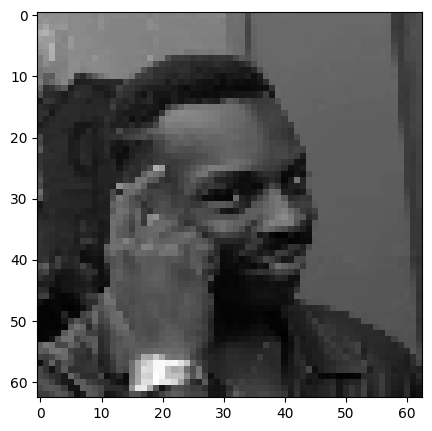

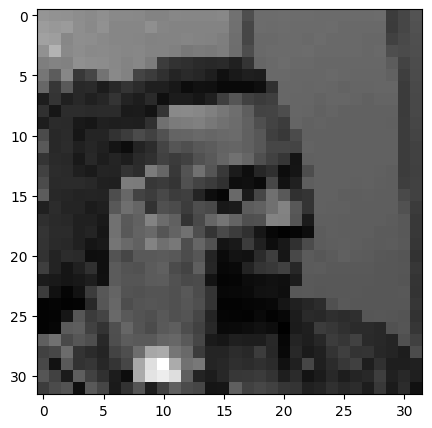

In [8]:
# load the image
# image = Image.open('test_image.png')
image = Image.open('test-image.png')
# convert image to numpy array
data = asarray(image)
data_subsample = subsample(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_subsample, cmap='gray')
plt.show()

data_subsample2 = subsample(data_subsample)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample2, cmap='gray')
plt.show()

data_subsample3 = subsample(data_subsample2)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

In [9]:
# Now let's try max-pooling
def maxpool(x_in):
    x_out = np.zeros((int(np.floor(x_in.shape[0] / 2)), int(np.floor(x_in.shape[1] / 2))))

    for i in range(x_out.shape[0]):
        for j in range(x_out.shape[1]):
            x_out[i, j] = np.max(x_in[i * 2:i * 2 + 2, j * 2:j * 2 + 2])  # Take max in 2x2 region

    return x_out

In [10]:
print("Original:")
print(orig_4_4)
print("Maxpooled:")
print(maxpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Maxpooled:
[[6. 8.]
 [8. 4.]]


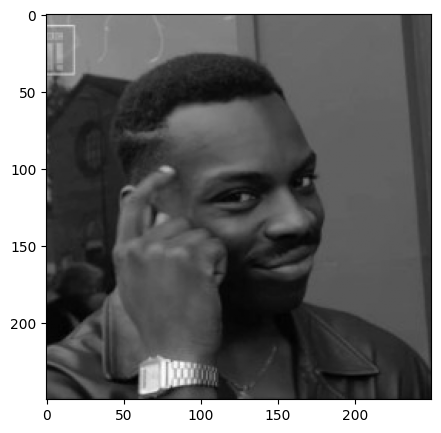

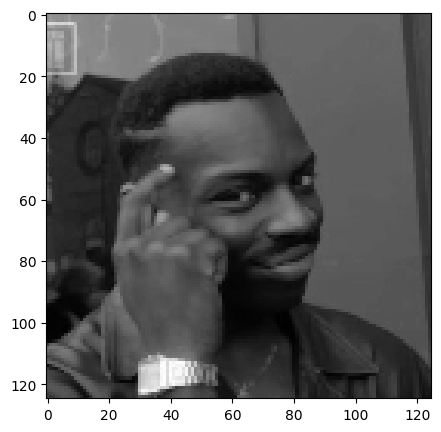

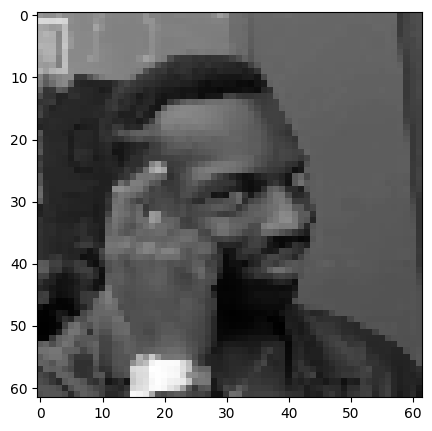

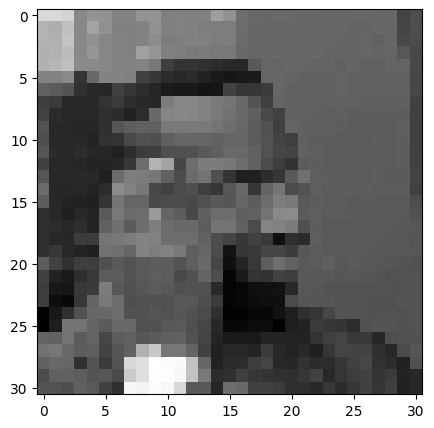

In [11]:
# Let's see what Eddie looks like:
data_maxpool = maxpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool, cmap='gray')
plt.show()

data_maxpool2 = maxpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool2, cmap='gray')
plt.show()

data_maxpool3 = maxpool(data_maxpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

You can see that the pixels gradually turn to white because we keep retaining the brightest local pixels.

In [12]:
# Finally, let's try mean pooling
def meanpool(x_in):
    x_out = np.zeros((int(np.floor(x_in.shape[0] / 2)), int(np.floor(x_in.shape[1] / 2))))

    for i in range(x_out.shape[0]):
        for j in range(x_out.shape[1]):
            x_out[i, j] = np.mean(x_in[i * 2:i * 2 + 2, j * 2:j * 2 + 2])  # Take mean in 2x2 region

    return x_out

In [13]:
print("Original:")
print(orig_4_4)
print("Meanpooled:")
print(meanpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Meanpooled:
[[3. 4.]
 [5. 2.]]


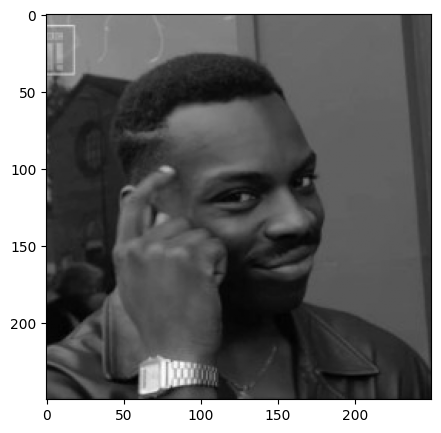

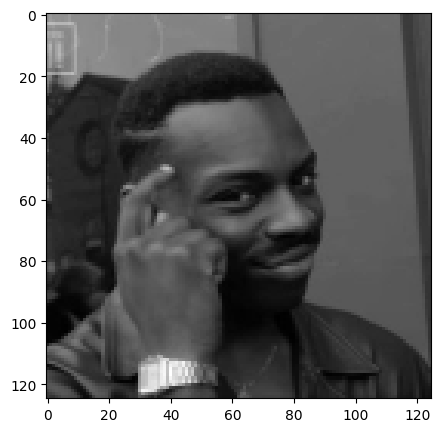

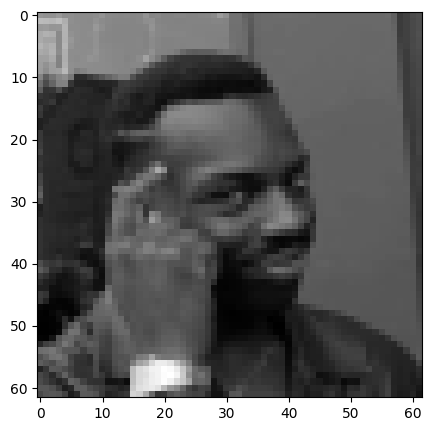

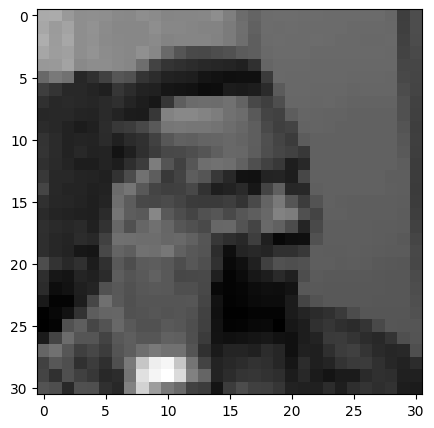

In [14]:
# Let's see what Eddie looks like:
data_meanpool = meanpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool, cmap='gray')
plt.show()

data_meanpool2 = meanpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool2, cmap='gray')
plt.show()

data_meanpool3 = meanpool(data_meanpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

Notice that the three low resolution images look quite different. <br>

Now let's upscale them again

In [15]:
# Define 2 by 2 original patch
orig_2_2 = np.array([[6, 8], [8,4]])
print(orig_2_2)

[[6 8]
 [8 4]]


In [16]:
# Let's first use the duplication method
def duplicate(x_in):
    x_out = np.zeros((x_in.shape[0] * 2, x_in.shape[1] * 2))

    for i in range(x_in.shape[0]):
        for j in range(x_in.shape[1]):
            x_out[i * 2:i * 2 + 2, j * 2:j * 2 + 2] = x_in[i, j]  # Duplicate each element into 2x2 region

    return x_out


In [17]:
print("Original:")
print(orig_2_2)
print("Duplicated:")
print(duplicate(orig_2_2))

Original:
[[6 8]
 [8 4]]
Duplicated:
[[6. 6. 8. 8.]
 [6. 6. 8. 8.]
 [8. 8. 4. 4.]
 [8. 8. 4. 4.]]


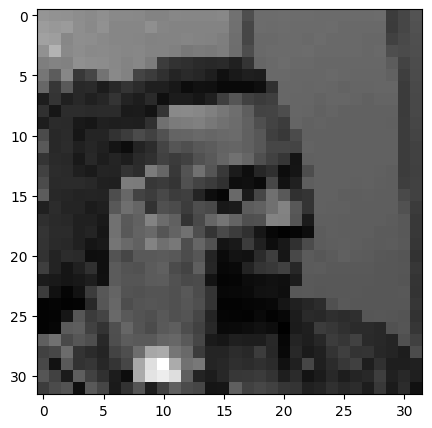

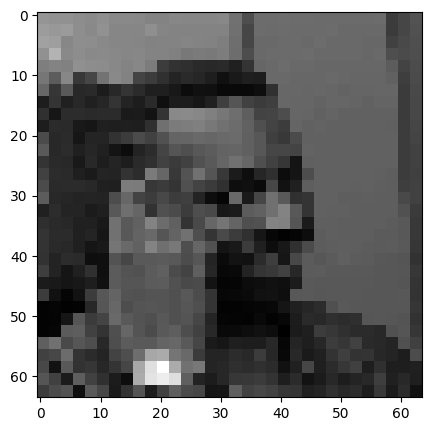

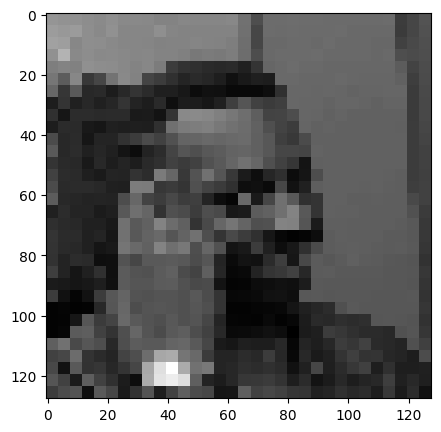

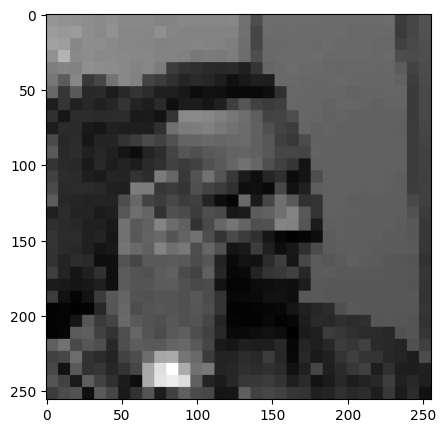

In [18]:
# Let's re-upsample, sub-sampled Eddie
data_duplicate = duplicate(data_subsample3);

plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_duplicate, cmap='gray')
plt.show()

data_duplicate2 = duplicate(data_duplicate)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate2, cmap='gray')
plt.show()

data_duplicate3 = duplicate(data_duplicate2)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate3, cmap='gray')
plt.show()

They look the same, but if you look at the axes, you'll see that the pixels are just duplicated.

In [19]:
# Now let's try max pooling back up
# The input x_high_res is the original high res image, from which you can deduce the position of the maximum index
def max_unpool(x_in, x_high_res):
    x_out = np.zeros((x_in.shape[0] * 2, x_in.shape[1] * 2))

    for i in range(x_in.shape[0]):
        for j in range(x_in.shape[1]):
            max_val = x_in[i, j]
            patch = x_high_res[i * 2:i * 2 + 2, j * 2:j * 2 + 2]
            max_idx = np.unravel_index(np.argmax(patch), patch.shape)
            x_out[i * 2 + max_idx[0], j * 2 + max_idx[1]] = max_val  # Place max value at original max location

    return x_out

In [20]:
print("Original:")
print(orig_2_2)
print("Max unpooled:")
print(max_unpool(orig_2_2,orig_4_4))

Original:
[[6 8]
 [8 4]]
Max unpooled:
[[0. 0. 0. 0.]
 [6. 0. 0. 8.]
 [0. 0. 0. 4.]
 [0. 8. 0. 0.]]


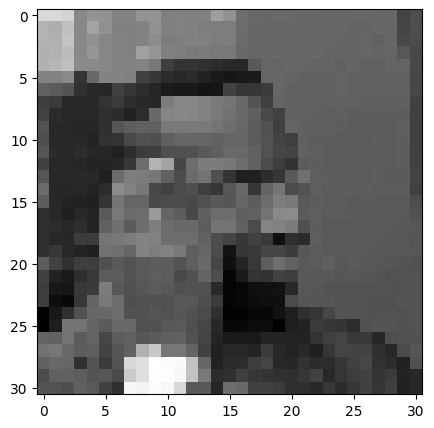

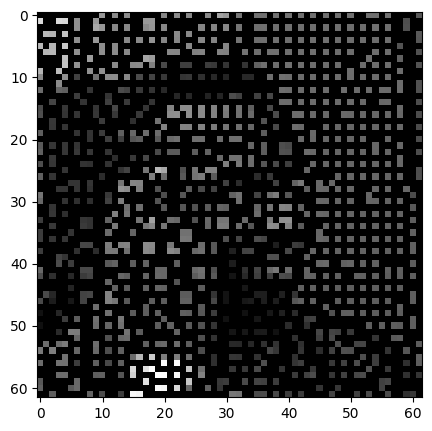

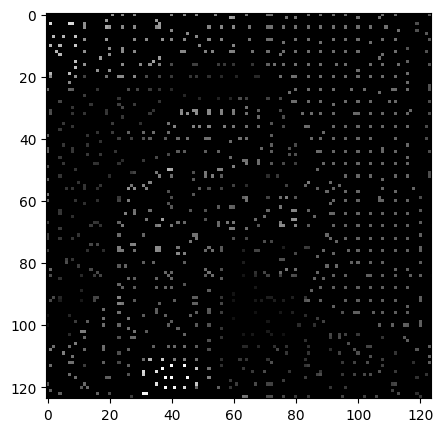

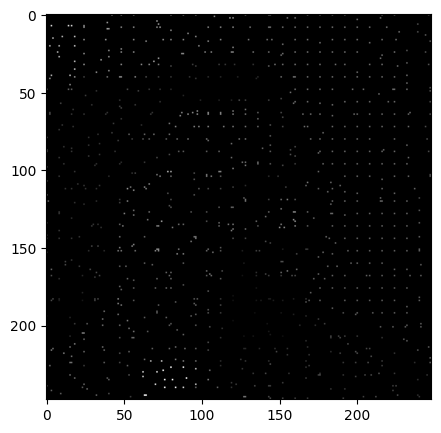

In [21]:
# Let's re-upsample, sub-sampled Eddie
data_max_unpool= max_unpool(data_maxpool3,data_maxpool2);

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool, cmap='gray')
plt.show()

data_max_unpool2 = max_unpool(data_max_unpool, data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool2, cmap='gray')
plt.show()

data_max_unpool3 = max_unpool(data_max_unpool2, data)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool3, cmap='gray')
plt.show()

Finally, we'll try upsampling using bilinear interpolation.  We'll treat the positions off the image as zeros by padding the original image and round fractional values upwards using np.ceil()

In [22]:
def bilinear(x_in):
    x_out = np.zeros((x_in.shape[0] * 2, x_in.shape[1] * 2))
    x_in_pad = np.zeros((x_in.shape[0] + 1, x_in.shape[1] + 1))
    x_in_pad[0:x_in.shape[0], 0:x_in.shape[1]] = x_in

    for i in range(x_out.shape[0]):
        for j in range(x_out.shape[1]):
            x0, y0 = i // 2, j // 2
            x1, y1 = min(x0 + 1, x_in.shape[0] - 1), min(y0 + 1, x_in.shape[1] - 1)

            dx, dy = (i / 2) - x0, (j / 2) - y0

            top = (1 - dx) * x_in_pad[x0, y0] + dx * x_in_pad[x1, y0]
            bottom = (1 - dx) * x_in_pad[x0, y1] + dx * x_in_pad[x1, y1]

            x_out[i, j] = (1 - dy) * top + dy * bottom

    return x_out

In [23]:
print("Original:")
print(orig_2_2)
print("Bilinear:")
print(bilinear(orig_2_2))

Original:
[[6 8]
 [8 4]]
Bilinear:
[[6.  7.  8.  8. ]
 [7.  6.5 6.  6. ]
 [8.  6.  4.  4. ]
 [8.  6.  4.  4. ]]


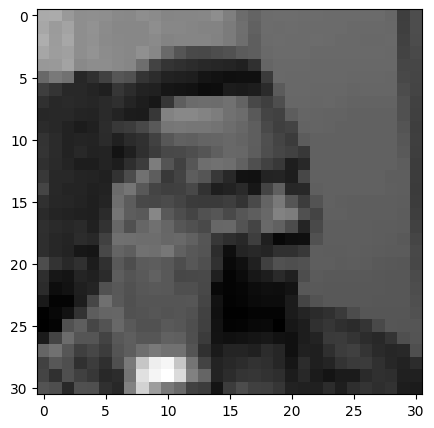

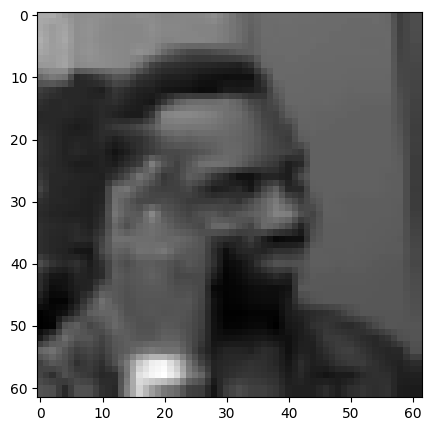

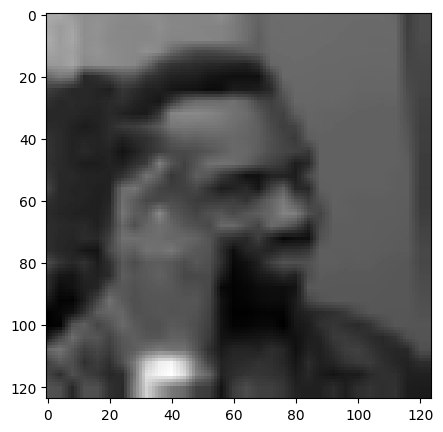

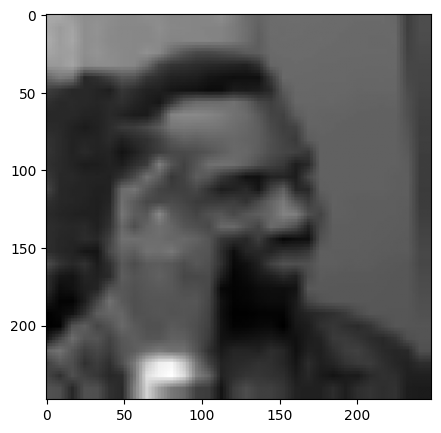

In [24]:
# Let's re-upsample, sub-sampled Eddie
data_bilinear = bilinear(data_meanpool3);

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_bilinear, cmap='gray')
plt.show()

data_bilinear2 = bilinear(data_bilinear)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear2, cmap='gray')
plt.show()

data_bilinear3 = duplicate(data_bilinear2)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear3, cmap='gray')
plt.show()